In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

2.15.0
11490434/11490434 [==============================] - 9s 1us/step



Epoch 1/10


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1104 - accuracy: 0.9661
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0373 - accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0128 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 770s 411ms/step - loss: 0.0071 - accu

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9914


313/313 [==============================] - 1s 2ms/step


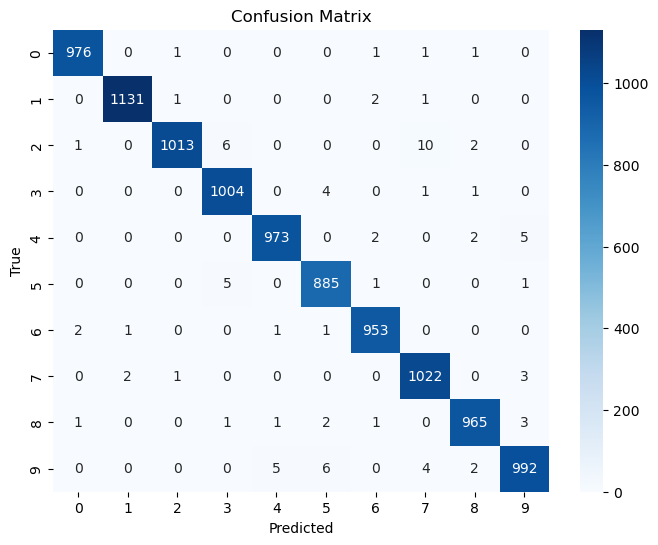

In [17]:

# Make predictions on the test set
predictions = np.argmax(model.predict(test_images), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()